Hineill David Céspedes Espinoza - 20213704

PREGUNTA 12:
Considere la ventana Blackman, que está definida por la siguiente formula,
W_B [n] = [0.42 -0.5 cos(2*pi*n/M) + 0.08 cos(4*pi *n /M) ]*w_r[n]
donde w_r[n] es la ventana rectangular de longitud M+1 coeficientes

a) (1 pto.) Dado M = 20 (es decir una longitud de 21 coeficientes), calcule
las transformadas de Fourier de tiempo discreto W_B (e^jw) y W_R (e^jw) de
las ventanas Blackman y rectangular respectivamente. Para ello puede
utilizar la función FFT considerando por lo menos 1024 puntos. Grafique
la magnitud en dB de las transformadas y determine la relación pico a
primer sidelobe en cada caso. También calcule el ancho (en radianes) de
las transformadas (para ello considere que el ancho está dado por la
frecuencia en la que la amplitud ha disminuido en 3 dBs con respecto al
pico). Determine en que caso se obtiene la mayor relación pico a primer
sidelobe y el mayor ancho espectral. Explique por qué ocurre esto.

In [ ]:
#IMPORTAMOS LIBRERÍAS
import numpy as np
from numpy.fft import fft , fftshift
import matplotlib.pyplot as plt
import scipy as scipy
#ANEXO DE FUNCIONES
def plotear_tiempo(idx, signal, title , expresion):
    plt.figure(figsize=(8, 5))  
    (markerline, stemlines, baseline) = plt.stem(idx, signal, linefmt='r-', markerfmt='bo', basefmt="k-", use_line_collection=True)
    plt.setp(stemlines, 'linewidth', 1.5)  
    plt.setp(markerline, 'markersize', 8)  
    plt.title(title, fontsize=14)
    plt.xlabel(r'Índice discreto, $n$', fontsize=12)
    plt.ylabel(r'Amplitud, ' + expresion, fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.6)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim([idx[0] - 1, idx[-1] + 1])
    plt.ylim([min(signal) - 0.1, max(signal) + 0.1])
    plt.legend([title], loc='best', fontsize=10)
    plt.tight_layout()
    plt.show()

C:\Users\Hineill\AppData\Local\Temp\ipykernel_54668\2155692580.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = plt.stem(idx, signal, linefmt='r-', markerfmt='bo', basefmt="k-", use_line_collection=True)


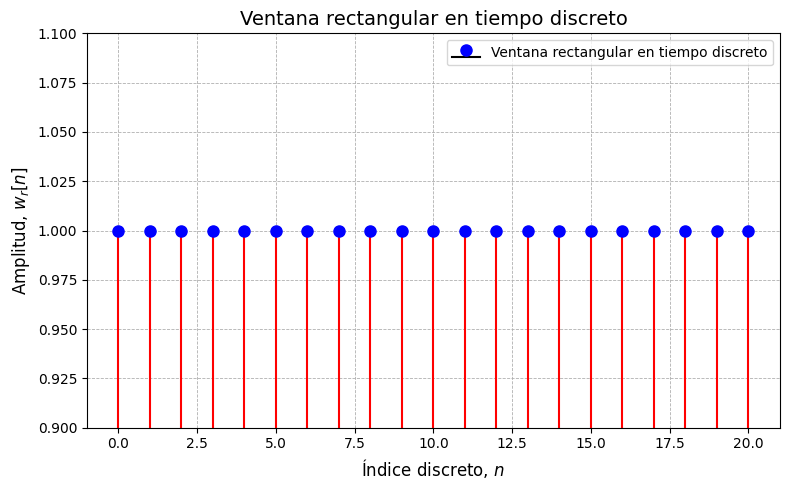

In [3]:
M=20 #
w_r = np.ones(M+1) #VENTANA RECTANGULAR
n = np.arange(M+1) #INDICES
plotear_tiempo(n, w_r, "Ventana rectangular en tiempo discreto" , '$w_r[n]$' )

C:\Users\Hineill\AppData\Local\Temp\ipykernel_54668\2155692580.py:9: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  (markerline, stemlines, baseline) = plt.stem(idx, signal, linefmt='r-', markerfmt='bo', basefmt="k-", use_line_collection=True)


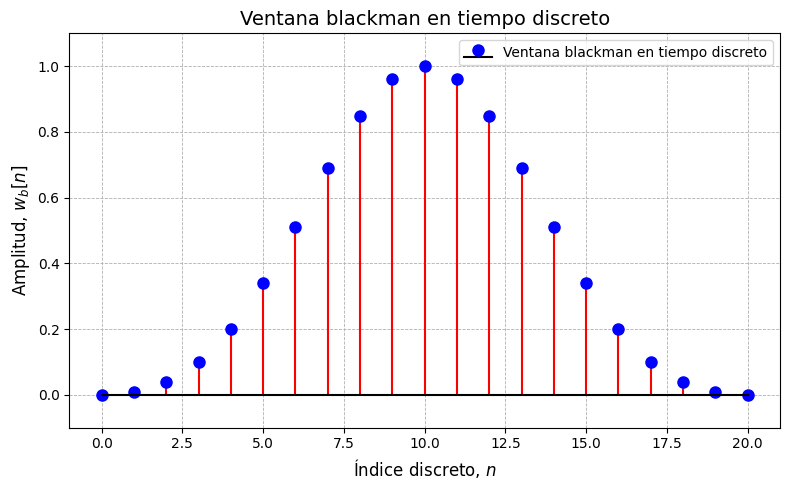

In [4]:
w_b = np.blackman(M+1) #ES LO MISMO Q ESCRIBIR LA EXPRESIÓN Q NOS DIERON 
plotear_tiempo(n, w_b, "Ventana blackman en tiempo discreto" , '$w_b[n]$' )

C:\Users\Hineill\AppData\Local\Temp\ipykernel_54668\2535420246.py:7: RuntimeWarning: divide by zero encountered in log10
  Blackman_window_spectrum_db =  20*np.log10(np.abs(Blackman_window_spectrum))


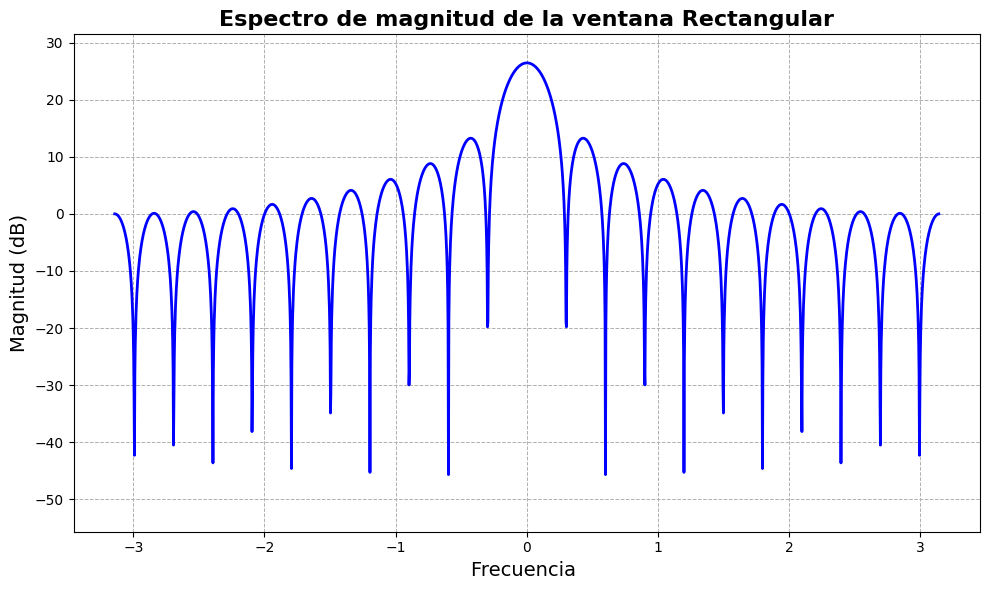

In [5]:
#PROBAMOS CON VENTANA RECTANGULAR
Rectangular_window_spectrum =  np.fft.fftshift(np.fft.fft(w_r, 2048))
Rectangular_window_spectrum_db =  20*np.log10(np.abs(Rectangular_window_spectrum))

#PROBAMOS CON VENTANA Blackman
Blackman_window_spectrum =  np.fft.fftshift(np.fft.fft(w_b, 2048))
Blackman_window_spectrum_db =  20*np.log10(np.abs(Blackman_window_spectrum))

freq =  np.linspace(-1*np.pi , np.pi , 2048)

plt.figure(figsize=(10, 6))
plt.plot(freq, Rectangular_window_spectrum_db, color='b', linewidth=2)
plt.title('Espectro de magnitud de la ventana Rectangular', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia ', fontsize=14)
plt.ylabel('Magnitud (dB)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylim([np.min(Rectangular_window_spectrum_db) - 10, np.max(Rectangular_window_spectrum_db) + 5])  # Ajustar el eje Y
plt.tight_layout()
plt.show()

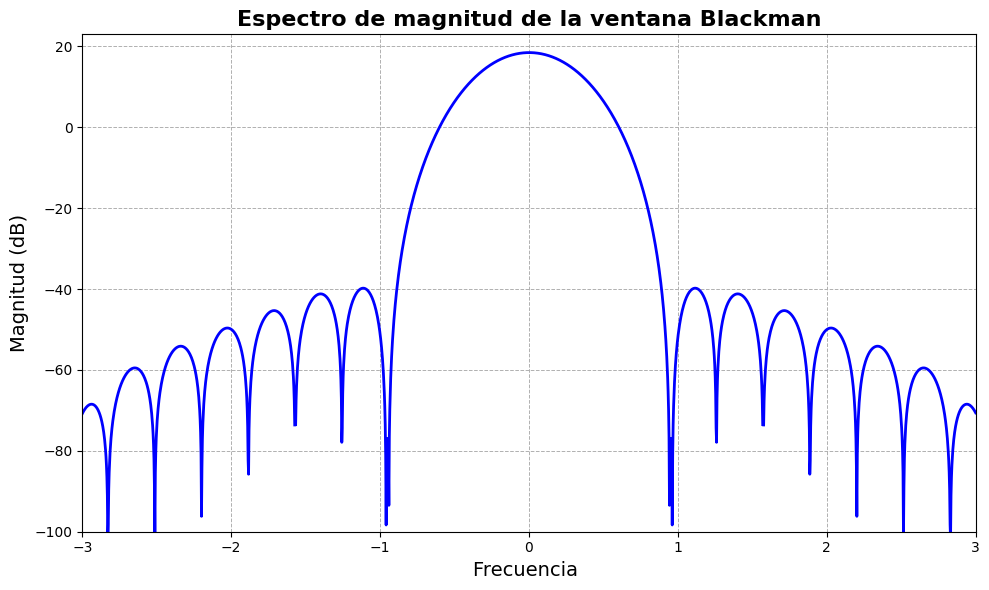

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(freq, Blackman_window_spectrum_db, color='b', linewidth=2)
plt.title('Espectro de magnitud de la ventana Blackman', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia ', fontsize=14)
plt.ylabel('Magnitud (dB)', fontsize=14)
plt.xlim([-3, 3])
plt.ylim([-100, 23])
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [7]:
#CALCULAMOS LA RELACIÓN PICO A SIDELOBE PARA CADA VENTANA 
#RECTANGULAR
Rectangular_window_spectrum_db
Blackman_window_spectrum_db
#OBTENEMOS LOS MAXIMOS LOCALES DE CADA lobulo y apartir de los indices y una función de scipy
maximos_locales_rectangular = Rectangular_window_spectrum_db[scipy.signal.argrelextrema(Rectangular_window_spectrum_db, np.greater)[0]]#Obtenemos los maximos locales de todo el espectro en db
main_lobe_rectangular =np.max(maximos_locales_rectangular) #LOBULO CENTRAL
second_lobe_rectangular = np.sort(maximos_locales_rectangular)[-2] #NOS DEVUELVE EL SEGUNDO PICO O SEA EL PICO DEL SEGUNDO SIDELOBE
relacion_pico_sidelobe_rectangular =  main_lobe_rectangular- second_lobe_rectangular #en realidad son dba al restar dbas se obtienes dbs y así cobra sentido como si fuera una relación

maximos_locales_blackman = Blackman_window_spectrum_db[scipy.signal.argrelextrema(Blackman_window_spectrum_db, np.greater)[0]]
main_lobe_blackman =np.max(maximos_locales_blackman) #LOBULO CENTRAL
second_lobe_blackman = np.sort(maximos_locales_blackman)[-2] #NOS DEVUELVE EL SEGUNDO PICO O SEA EL PICO DEL SEGUNDO SIDELOBE
relacion_pico_sidelobe_blackman =  main_lobe_blackman- second_lobe_blackman #en realidad son dba al restar dbas se obtienes dbs y así cobra sentido como si fuera una relación

print(f"----------RELACIONES DE SIDELOBE TO PEAK------------") 
print(f"La relación de sidelobe to peak para la ventana rectangular es de : {relacion_pico_sidelobe_rectangular} dB" )
print(f"La relación de sidelobe to peak para la ventana blackman es de : {relacion_pico_sidelobe_blackman} dB" )


----------RELACIONES DE SIDELOBE TO PEAK------------
La relación de sidelobe to peak para la ventana rectangular es de : 13.195768071194452 dB
La relación de sidelobe to peak para la ventana blackman es de : 58.25739969636349 dB


In [8]:
def calculo_frecuencia_criterio_3db(espectro_db, freq):
    max_value = np.max(espectro_db)
    nivel_3db = max_value-3
    fake_idx = np.argmin(np.abs(np.flip(espectro_db)-nivel_3db)) #Invertimos el arreglo para hallar el indice de la frecuencia de corte de la derecha
    valor_a_3_db = np.flip(espectro_db)[fake_idx]
    indice = np.where(valor_a_3_db == espectro_db )
    return freq[indice][-1]
#AHORA CALCULAMOS ANCHO ESPECTRAL 
#USAMOS EL CRITERIO DE -3 Db
frecuencia_corte_rectangular = calculo_frecuencia_criterio_3db(Rectangular_window_spectrum_db,freq)
frecuencia_corte_blackman =  calculo_frecuencia_criterio_3db(Blackman_window_spectrum_db,freq)

print("------------CALCULO DE LAS FRECUENICAS DE CORTE DE LAS VENTANAS -------")
print(f"La frecuencia de corte de la ventana blackman  es de :{frecuencia_corte_blackman}")
print(f"La frecuencia de corte de la ventana rectangular  es de :{frecuencia_corte_rectangular}")
print("---------CALCULO ANCHO ESPECTRAL DE LAS VENTANAS-------------")
print(f"El ancho espectral de la ventana blackman  es de :{2*frecuencia_corte_blackman} radianes")
print(f"El ancho espectral  de la ventana rectangular  es de :{2*frecuencia_corte_rectangular} radianes ")


------------CALCULO DE LAS FRECUENICAS DE CORTE DE LAS VENTANAS -------
La frecuencia de corte de la ventana blackman  es de :0.2593693983667196
La frecuencia de corte de la ventana rectangular  es de :0.13352152460298594
---------CALCULO ANCHO ESPECTRAL DE LAS VENTANAS-------------
El ancho espectral de la ventana blackman  es de :0.5187387967334391 radianes
El ancho espectral  de la ventana rectangular  es de :0.2670430492059719 radianes 


In [9]:
#COMPARACIÓN DE RELACIÓN SIDELOBE Y ANCHO ESPECTRAL 
#relacion sidelobe to peak 
if(relacion_pico_sidelobe_rectangular>relacion_pico_sidelobe_blackman):
    print(f"La ventana rectangular tiene una mayor relación de peak to sidelobe , con {relacion_pico_sidelobe_rectangular} db")
else:
    print(f"La ventana blackman tiene una mayor relación de peak to sidelobe , con {relacion_pico_sidelobe_blackman} db")

if(frecuencia_corte_rectangular>frecuencia_corte_blackman):
    print(f"La ventana rectangular tiene un mayor ancho espectral , con {2*frecuencia_corte_rectangular}")
else:
    print(f"La ventana blackman tiene un mayor ancho espectral , con {2*frecuencia_corte_blackman}")


La ventana blackman tiene una mayor relación de peak to sidelobe , con 58.25739969636349 db
La ventana blackman tiene un mayor ancho espectral , con 0.5187387967334391


La ventana blackman posee una maayor relación peak to sidelobe y un mayor ancho espectral (era notable desde las gráficas iniciales).

Esta relación más notaria de la ventana blackman para eliminar las componentes de frecuencia que no se encuentren dentro de la banda de paso , se debe a que en realidad esta está diseñada para poder analizar de forma más precisa dado que al componerse de señales cosenoidales altera su fase de tal forma que ofrece una mejor eliminación en la banda de rechazo (se refleja en la relación entre sidelobes) . Además q al compararla con una ventana rectangulaar, es notable que esta es basica y no aporta ningún grado de facilidad de analisis mayor a la señal aparte de limitarla. 

b) (1 pto.) Ahora vamos a utilizar estas ventanas (Blackman y rectangular)
para diseñar un filtro pasabajos aplicando el método de enventanado.
Para ello consideremos que la frecuencia de corte del filtro es W_C = pi /4 . Para M = 20, grafique la respuesta en frecuencia de los filtros diseñados
utilizando ambos tipos de ventanas. En cada caso determine la relación
en dBs entre la banda de paso y la banda de rechazo, así como el ancho
de la banda de transición. ¿En qué caso se obtiene el menor rizado?
Justifique su respuesta

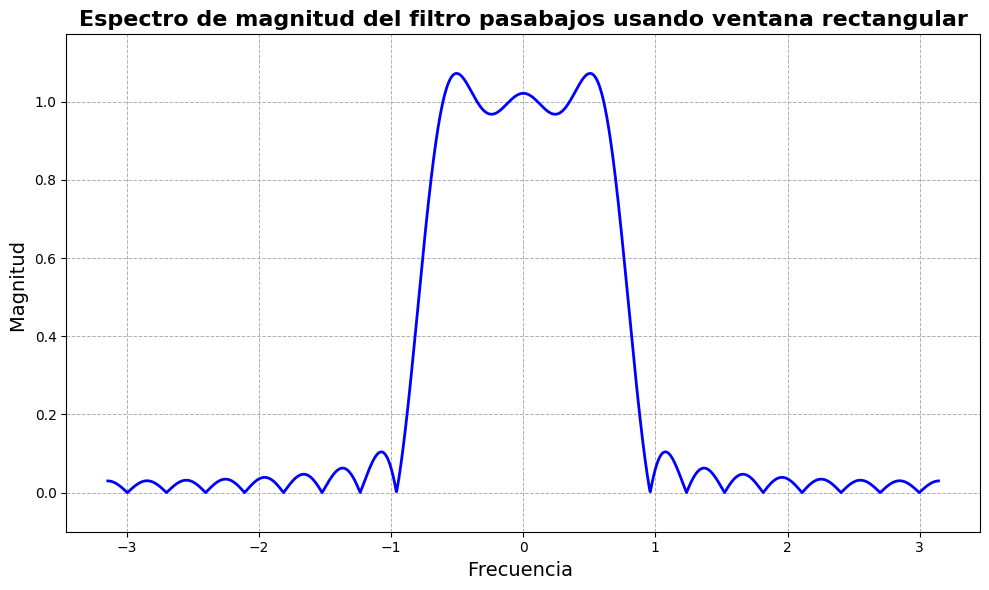

In [10]:
#EMPLEAMOS EL METODO DE DISEÑO USANDO EL ENVENTANADO QUE HEMOS CREADO

#LPF ENVENTANADO RECTANGULAR
w_c = np.pi /4.0
M=20
n=np.arange(M+1)
#RESPUESTA AL IMPULSO DE UN FILTRO IDEAL 
h = w_c* np.sinc(((n-M/2)*w_c)/np.pi)/np.pi 

#AHORA LA APLICAMOS PARA RECTANGULAR
h_ventana_rectangular =  h #En realidad sería lo mismo q multiplicar por un arreglo de unos lo mismo q truncar al inicio 
espectro_ventana_rectangular= np.fft.fftshift(np.fft.fft(h_ventana_rectangular, 2048))
espectro_ventana_rectangular_db =  20*np.log10(np.abs(espectro_ventana_rectangular))

#PLOTEAMOS LA RECTANGULAR

freq =  np.linspace(-1*np.pi , np.pi , 2048)
espectro_ventana_rectangular_mag = np.abs(espectro_ventana_rectangular)
plt.figure(figsize=(10, 6))
plt.plot(freq, espectro_ventana_rectangular_mag, color='b', linewidth=2)
plt.title('Espectro de magnitud del filtro pasabajos usando ventana rectangular', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia ', fontsize=14)
plt.ylabel('Magnitud ', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylim([np.min(espectro_ventana_rectangular_mag)-0.1 , np.max(espectro_ventana_rectangular_mag) +  0.1])  
plt.tight_layout()
plt.show()

<StemContainer object of 3 artists>

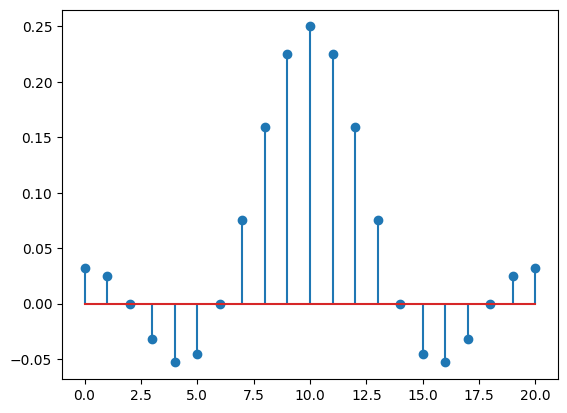

In [11]:
plt.stem(h)

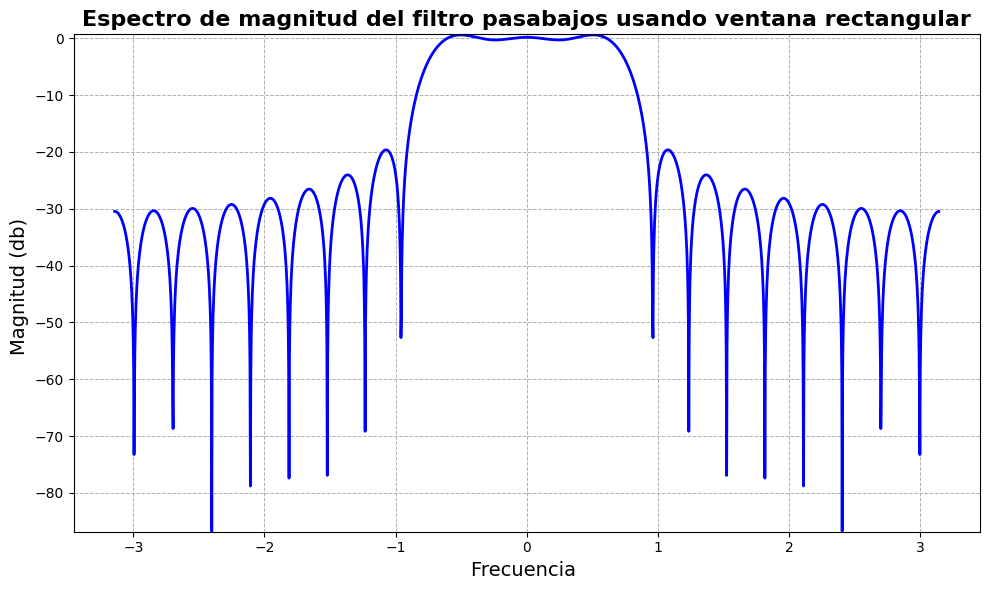

In [233]:
freq =  np.linspace(-1*np.pi , np.pi , 2048)
plt.figure(figsize=(10, 6))
plt.plot(freq, espectro_ventana_rectangular_db, color='b', linewidth=2)
plt.title('Espectro de magnitud del filtro pasabajos usando ventana rectangular', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia ', fontsize=14)
plt.ylabel('Magnitud (db) ', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylim([np.min(espectro_ventana_rectangular_db)-0.1 , np.max(espectro_ventana_rectangular_db) +  0.1])  # Ajustar el eje Y
plt.tight_layout()
plt.show()

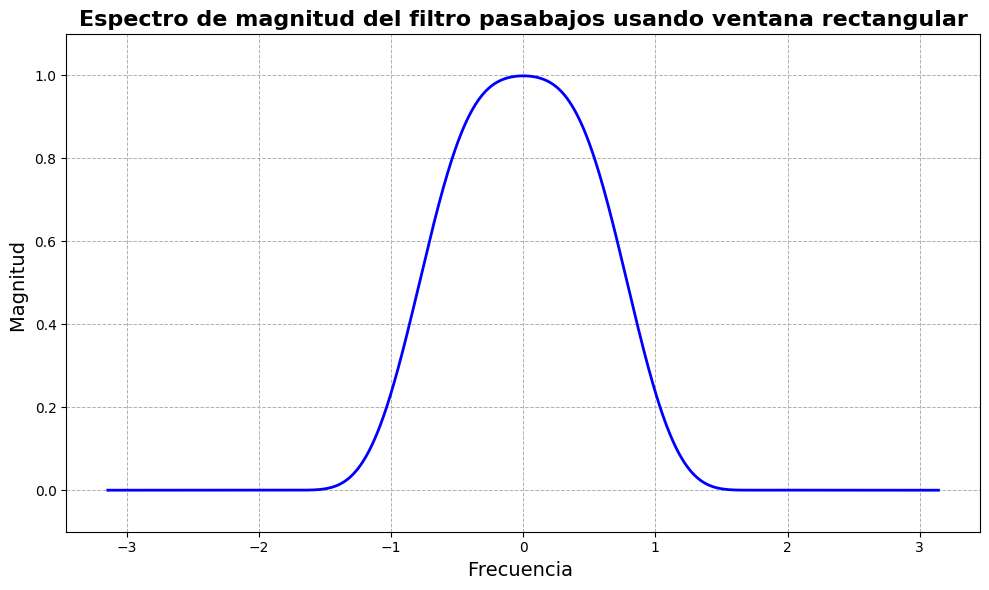

In [234]:
#LPF ENVENTANADO BLACKMAN
w_c = np.pi /4.0
M=20
n=np.arange(M+1)
#RESPUESTA AL IMPULSO DE UN FILTRO IDEAL 
h = w_c* np.sinc(((n-M/2)*w_c)/np.pi)/np.pi 

#AHORA LA APLICAMOS PARA BLACKMAN
h_ventana_blackman =  h  * np.blackman(M+1) #ES LO MISMO Q ESCRIBIR LA EXPRESIÓN Q NOS DIERON 
espectro_ventana_blackman= np.fft.fftshift(np.fft.fft(h_ventana_blackman, 2048))
espectro_ventana_blackman_db =  20*np.log10(np.abs(espectro_ventana_blackman))

#PLOTEAMOS LPF blackman

freq =  np.linspace(-1*np.pi , np.pi , 2048)
espectro_ventana_blackman_mag = np.abs(espectro_ventana_blackman)
plt.figure(figsize=(10, 6))
plt.plot(freq, espectro_ventana_blackman_mag, color='b', linewidth=2)
plt.title('Espectro de magnitud del filtro pasabajos usando ventana rectangular', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia ', fontsize=14)
plt.ylabel('Magnitud ', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylim([np.min(espectro_ventana_blackman_mag)-0.1 , np.max(espectro_ventana_blackman_mag) +  0.1])  
plt.tight_layout()
plt.show()


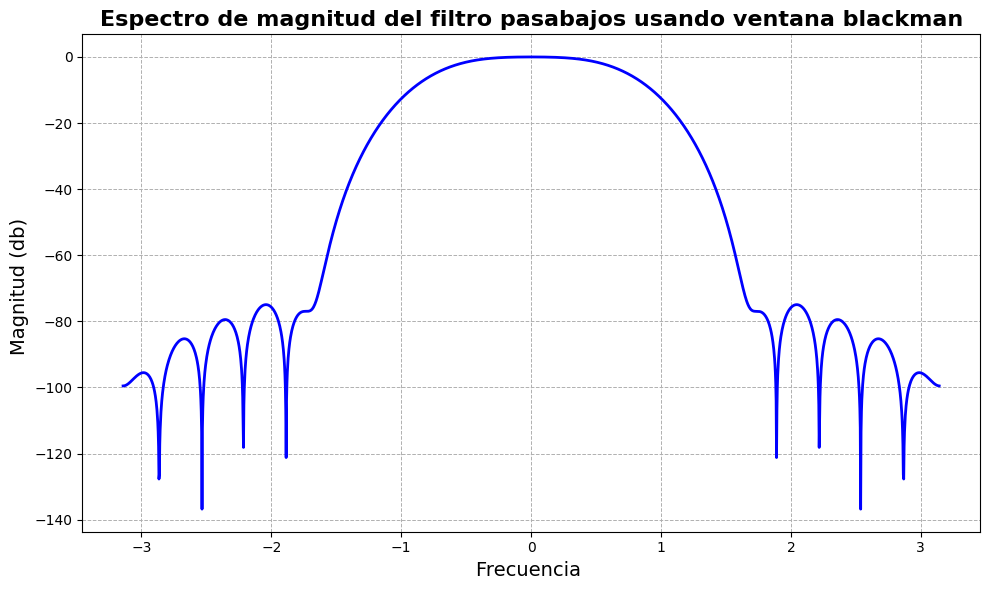

In [237]:
#AHORA GRAFICO EN DB 
freq =  np.linspace(-1*np.pi , np.pi , 2048)
plt.figure(figsize=(10, 6))
plt.plot(freq, espectro_ventana_blackman_db, color='b', linewidth=2)
plt.title('Espectro de magnitud del filtro pasabajos usando ventana blackman', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia ', fontsize=14)
plt.ylabel('Magnitud (db) ', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [266]:
#DATOS RECOLECTADOS 
#M=20
espectro_ventana_blackman_db
espectro_ventana_blackman
espectro_ventana_rectangular_db
espectro_ventana_rectangular

#CALCULO ANCHO DE BANDA 
    #RECTANGULAR
frecuencia_corte_rectangular = calculo_frecuencia_criterio_3db(espectro_ventana_rectangular_db,freq)
    #BLACKMAN
frecuencia_corte_blackman = calculo_frecuencia_criterio_3db(espectro_ventana_blackman_db,freq)
#CALCULO ENTRE LA BANDA DE PASO Y LA BANDA DE RECHAZO
#nivel promedio en la banda de paso 
array_banda_paso_blackman =[]
array_banda_rechazo_blackman =[]

for i in range(len(espectro_ventana_blackman)):
    if(espectro_ventana_blackman_db[i]>-3):
        array_banda_paso_blackman.append(np.abs(espectro_ventana_blackman[i]))
    if(espectro_ventana_blackman_db[i]<-10):
        array_banda_rechazo_blackman.append(np.abs(espectro_ventana_blackman[i]))
rizado_banda_paso_blackman =  10*np.log10(np.ptp(np.array(array_banda_paso_blackman)))
rizado_banda_rechazo_blackman = 10*np.log10( np.ptp(np.array(array_banda_rechazo_blackman)))
nivel_banda_paso_blackman = 20*np.log10(np.mean(array_banda_paso_blackman))
nivel_banda_rechazo_blackman = 20*np.log10(np.mean(array_banda_rechazo_blackman))
relacion_paso_rechazo_blackman= nivel_banda_paso_blackman-nivel_banda_rechazo_blackman


#rectangular

array_banda_paso_rectangular =[]
array_banda_rechazo_rectangular =[]

for i in range(len(espectro_ventana_rectangular)):
    if(espectro_ventana_rectangular_db[i]>-3):
        array_banda_paso_rectangular.append(np.abs(espectro_ventana_rectangular[i]))
    if(espectro_ventana_rectangular_db[i]<-10):
        array_banda_rechazo_rectangular.append(np.abs(espectro_ventana_rectangular[i]))
rizado_banda_paso_rectangular =  10*np.log10(np.ptp(np.array(array_banda_paso_rectangular)))
rizado_banda_rechazo_rectangular = 10*np.log10( np.ptp(np.array(array_banda_rechazo_rectangular)))
nivel_banda_paso_rectangular = 20*np.log10(np.mean(array_banda_paso_rectangular))
nivel_banda_rechazo_rectangular = 20*np.log10(np.mean(array_banda_rechazo_rectangular))
relacion_paso_rechazo_rectangular= nivel_banda_paso_rectangular-nivel_banda_rechazo_rectangular



print("PARA M=20")
#BANDA DE TRANSICIÓN 
print("------------RESULTADOS DE LA VENTANA BLACKMAN------------")
print(f"Rizado en la banda de paso de Blackman: {-rizado_banda_paso_blackman:.2f} dB")
print(f"Rizado en la banda de rechazo de Blackman: {-rizado_banda_rechazo_blackman:.2f} dB")
print(f"Nivel en la banda de paso de Blackman: {nivel_banda_paso_blackman:.2f} dB")
print(f"Nivel en la banda de rechazo de Blackman: {nivel_banda_rechazo_blackman} dB")
print(f"Relación paso-rechazo de Blackman: {relacion_paso_rechazo_blackman} dB")
print("----------------------------------------------------------")

print("------------RESULTADOS DE LA VENTANA RECTANGULAR------------")
print(f"Rizado en la banda de paso de RECTANGULAR: {-rizado_banda_paso_rectangular:.2f} dB")
print(f"Rizado en la banda de rechazo de RECTANGULAR: {-rizado_banda_rechazo_rectangular:.2f} dB")
print(f"Nivel en la banda de paso de RECTANGULAR: {nivel_banda_paso_rectangular:.2f} dB")
print(f"Nivel en la banda de rechazo de RECTANGULAR: {nivel_banda_rechazo_rectangular} dB")
print(f"Relación paso-rechazo de RECTANGULAR: {relacion_paso_rechazo_rectangular} dB")

print(f"El ancho de banda de transición de la ventana rectangular es: {2*frecuencia_corte_rectangular}")
print(f"El ancho de banda de transición de la ventana blackman es: {2*frecuencia_corte_blackman}")

PARA M=20
------------RESULTADOS DE LA VENTANA BLACKMAN------------
Rizado en la banda de paso de Blackman: 5.40 dB
Rizado en la banda de rechazo de Blackman: 5.08 dB
Nivel en la banda de paso de Blackman: -0.32 dB
Nivel en la banda de rechazo de Blackman: -38.082508036209866 dB
Relación paso-rechazo de Blackman: 37.76035111245163 dB
----------------------------------------------------------
------------RESULTADOS DE LA VENTANA RECTANGULAR------------
Rizado en la banda de paso de RECTANGULAR: 4.24 dB
Rizado en la banda de rechazo de RECTANGULAR: 5.20 dB
Nivel en la banda de paso de RECTANGULAR: -0.02 dB
Nivel en la banda de rechazo de RECTANGULAR: -36.284917051434306 dB
Relación paso-rechazo de RECTANGULAR: 36.26299716910331 dB
El ancho de banda de transición de la ventana rectangular es: 1.482549342143498
El ancho de banda de transición de la ventana blackman es: 1.4088822940866788


Por observación en lo calculado podemos determinar que hay un mayor rizado en la ventana rectangular a fuera de la banda de paso pero hay mayor rizado dentro de la banda de paso. Esto se puede deber a la mayor cantidad de componenetes frecuenciales que debe de tener por representar cambios rapidos una pendiente muy pronunciada.

c) (1 pto.) Repetimos la parte b) pero considerando M = 40. ¿En qué caso,
en comparación con la parte b), la banda de transición es más angosta?
Justifique su respuesta.

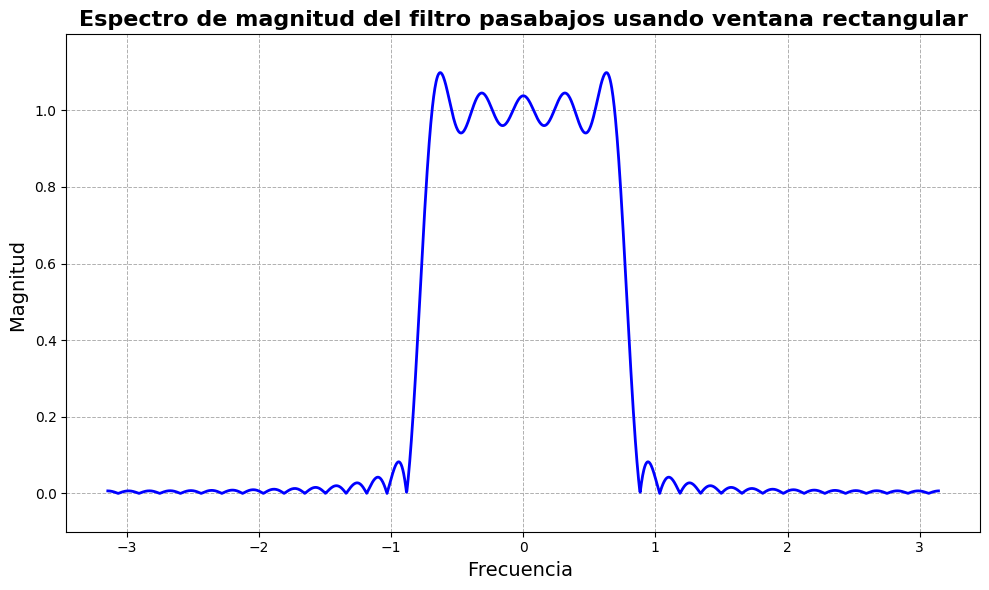

In [267]:
#REPETIMOS LA B) CON M=40

#EMPLEAMOS EL METODO DE DISEÑO USANDO EL ENVENTANADO QUE HEMOS CREADO
#LPF ENVENTANADO RECTANGULAR
w_c = np.pi /4.0
M=40
n=np.arange(M+1)
#RESPUESTA AL IMPULSO DE UN FILTRO IDEAL 
h = w_c* np.sinc(((n-M/2)*w_c)/np.pi)/np.pi 

#AHORA LA APLICAMOS PARA RECTANGULAR
h_ventana_rectangular =  h #En realidad sería lo mismo q multiplicar por un arreglo de unos lo mismo q truncar al inicio 
espectro_ventana_rectangular= np.fft.fftshift(np.fft.fft(h_ventana_rectangular, 2048))
espectro_ventana_rectangular_db =  20*np.log10(np.abs(espectro_ventana_rectangular))

#PLOTEAMOS LA RECTANGULAR

freq =  np.linspace(-1*np.pi , np.pi , 2048)
espectro_ventana_rectangular_mag = np.abs(espectro_ventana_rectangular)
plt.figure(figsize=(10, 6))
plt.plot(freq, espectro_ventana_rectangular_mag, color='b', linewidth=2)
plt.title('Espectro de magnitud del filtro pasabajos usando ventana rectangular', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia ', fontsize=14)
plt.ylabel('Magnitud ', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylim([np.min(espectro_ventana_rectangular_mag)-0.1 , np.max(espectro_ventana_rectangular_mag) +  0.1])  
plt.tight_layout()
plt.show()

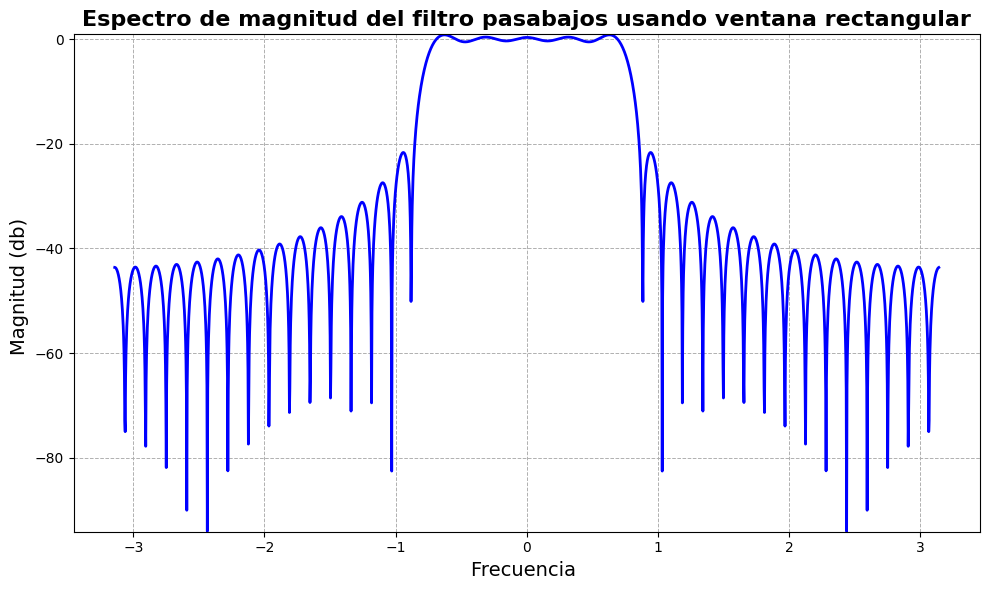

In [268]:
freq =  np.linspace(-1*np.pi , np.pi , 2048)
plt.figure(figsize=(10, 6))
plt.plot(freq, espectro_ventana_rectangular_db, color='b', linewidth=2)
plt.title('Espectro de magnitud del filtro pasabajos usando ventana rectangular', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia ', fontsize=14)
plt.ylabel('Magnitud (db) ', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylim([np.min(espectro_ventana_rectangular_db)-0.1 , np.max(espectro_ventana_rectangular_db) +  0.1])  # Ajustar el eje Y
plt.tight_layout()
plt.show()

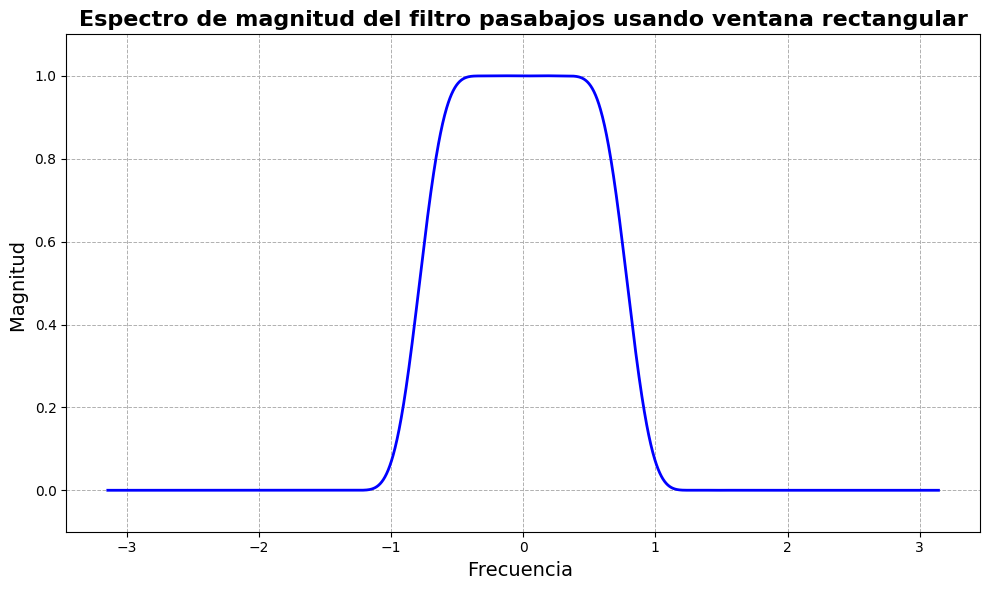

In [269]:
#LPF ENVENTANADO BLACKMAN
w_c = np.pi /4.0
M=40
n=np.arange(M+1)
#RESPUESTA AL IMPULSO DE UN FILTRO IDEAL 
h = w_c* np.sinc(((n-M/2)*w_c)/np.pi)/np.pi 

#AHORA LA APLICAMOS PARA BLACKMAN
h_ventana_blackman =  h  * np.blackman(M+1) #ES LO MISMO Q ESCRIBIR LA EXPRESIÓN Q NOS DIERON 
espectro_ventana_blackman= np.fft.fftshift(np.fft.fft(h_ventana_blackman, 2048))
espectro_ventana_blackman_db =  20*np.log10(np.abs(espectro_ventana_blackman))

#PLOTEAMOS LPF blackman

freq =  np.linspace(-1*np.pi , np.pi , 2048)
espectro_ventana_blackman_mag = np.abs(espectro_ventana_blackman)
plt.figure(figsize=(10, 6))
plt.plot(freq, espectro_ventana_blackman_mag, color='b', linewidth=2)
plt.title('Espectro de magnitud del filtro pasabajos usando ventana rectangular', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia ', fontsize=14)
plt.ylabel('Magnitud ', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.ylim([np.min(espectro_ventana_blackman_mag)-0.1 , np.max(espectro_ventana_blackman_mag) +  0.1])  
plt.tight_layout()
plt.show()

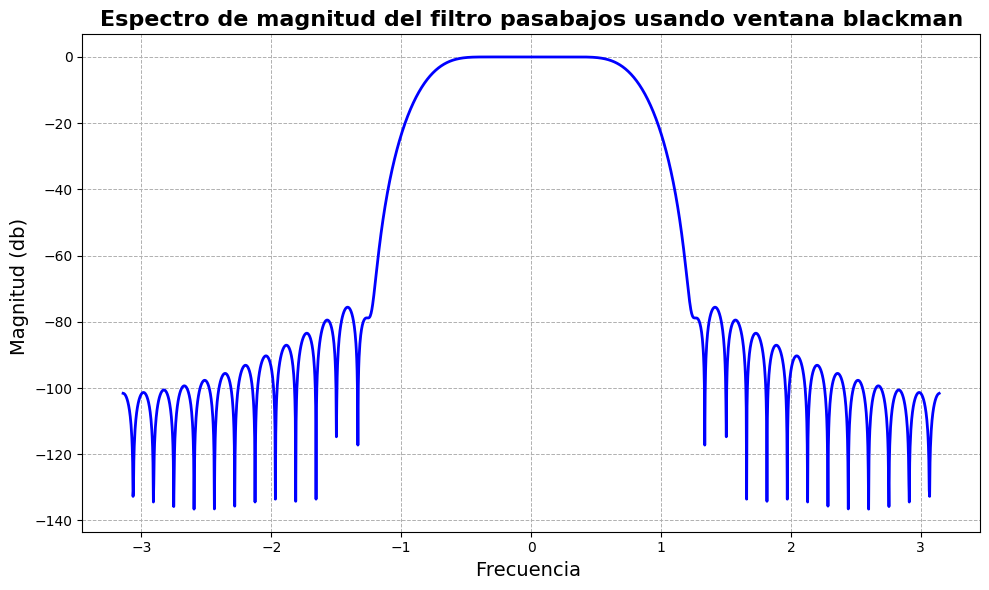

In [270]:
#AHORA GRAFICO EN DB 
freq =  np.linspace(-1*np.pi , np.pi , 2048)
plt.figure(figsize=(10, 6))
plt.plot(freq, espectro_ventana_blackman_db, color='b', linewidth=2)
plt.title('Espectro de magnitud del filtro pasabajos usando ventana blackman', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia ', fontsize=14)
plt.ylabel('Magnitud (db) ', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [272]:
#DATOS RECOLECTADOS 
#M=20
espectro_ventana_blackman_db
espectro_ventana_blackman
espectro_ventana_rectangular_db
espectro_ventana_rectangular

#CALCULO ANCHO DE BANDA 
    #RECTANGULAR
frecuencia_corte_rectangular = calculo_frecuencia_criterio_3db(espectro_ventana_rectangular_db,freq)
    #BLACKMAN
frecuencia_corte_blackman = calculo_frecuencia_criterio_3db(espectro_ventana_blackman_db,freq)
#CALCULO ENTRE LA BANDA DE PASO Y LA BANDA DE RECHAZO
#nivel promedio en la banda de paso 
array_banda_paso_blackman =[]
array_banda_rechazo_blackman =[]

for i in range(len(espectro_ventana_blackman)):
    if(espectro_ventana_blackman_db[i]>-3):
        array_banda_paso_blackman.append(np.abs(espectro_ventana_blackman[i]))
    if(espectro_ventana_blackman_db[i]<-10):
        array_banda_rechazo_blackman.append(np.abs(espectro_ventana_blackman[i]))
rizado_banda_paso_blackman =  10*np.log10(np.ptp(np.array(array_banda_paso_blackman)))
rizado_banda_rechazo_blackman = 10*np.log10( np.ptp(np.array(array_banda_rechazo_blackman)))
nivel_banda_paso_blackman = 20*np.log10(np.mean(array_banda_paso_blackman))
nivel_banda_rechazo_blackman = 20*np.log10(np.mean(array_banda_rechazo_blackman))
relacion_paso_rechazo_blackman= nivel_banda_paso_blackman-nivel_banda_rechazo_blackman


#rectangular

array_banda_paso_rectangular =[]
array_banda_rechazo_rectangular =[]

for i in range(len(espectro_ventana_rectangular)):
    if(espectro_ventana_rectangular_db[i]>-3):
        array_banda_paso_rectangular.append(np.abs(espectro_ventana_rectangular[i]))
    if(espectro_ventana_rectangular_db[i]<-10):
        array_banda_rechazo_rectangular.append(np.abs(espectro_ventana_rectangular[i]))
rizado_banda_paso_rectangular =  10*np.log10(np.ptp(np.array(array_banda_paso_rectangular)))
rizado_banda_rechazo_rectangular = 10*np.log10( np.ptp(np.array(array_banda_rechazo_rectangular)))
nivel_banda_paso_rectangular = 20*np.log10(np.mean(array_banda_paso_rectangular))
nivel_banda_rechazo_rectangular = 20*np.log10(np.mean(array_banda_rechazo_rectangular))
relacion_paso_rechazo_rectangular= nivel_banda_paso_rectangular-nivel_banda_rechazo_rectangular



print("PARA M=40")
#BANDA DE TRANSICIÓN 
print("------------RESULTADOS DE LA VENTANA BLACKMAN------------")
print(f"Rizado en la banda de paso de Blackman: {-rizado_banda_paso_blackman:.2f} dB")
print(f"Rizado en la banda de rechazo de Blackman: {-rizado_banda_rechazo_blackman:.2f} dB")
print(f"Nivel en la banda de paso de Blackman: {nivel_banda_paso_blackman:.2f} dB")
print(f"Nivel en la banda de rechazo de Blackman: {nivel_banda_rechazo_blackman} dB")
print(f"Relación paso-rechazo de Blackman: {relacion_paso_rechazo_blackman} dB")
print("----------------------------------------------------------")

print("------------RESULTADOS DE LA VENTANA RECTANGULAR------------")
print(f"Rizado en la banda de paso de RECTANGULAR: {-rizado_banda_paso_rectangular:.2f} dB")
print(f"Rizado en la banda de rechazo de RECTANGULAR: {-rizado_banda_rechazo_rectangular:.2f} dB")
print(f"Nivel en la banda de paso de RECTANGULAR: {nivel_banda_paso_rectangular:.2f} dB")
print(f"Nivel en la banda de rechazo de RECTANGULAR: {nivel_banda_rechazo_rectangular} dB")
print(f"Relación paso-rechazo de RECTANGULAR: {relacion_paso_rechazo_rectangular} dB")

print(f"El ancho de banda de transición de la ventana rectangular es: {2*frecuencia_corte_rectangular}")
print(f"El ancho de banda de transición de la ventana blackman es: {2*frecuencia_corte_blackman}")

PARA M=40
------------RESULTADOS DE LA VENTANA BLACKMAN------------
Rizado en la banda de paso de Blackman: 5.40 dB
Rizado en la banda de rechazo de Blackman: 5.08 dB
Nivel en la banda de paso de Blackman: -0.32 dB
Nivel en la banda de rechazo de Blackman: -38.082508036209866 dB
Relación paso-rechazo de Blackman: 37.76035111245163 dB
----------------------------------------------------------
------------RESULTADOS DE LA VENTANA RECTANGULAR------------
Rizado en la banda de paso de RECTANGULAR: 4.24 dB
Rizado en la banda de rechazo de RECTANGULAR: 5.20 dB
Nivel en la banda de paso de RECTANGULAR: -0.02 dB
Nivel en la banda de rechazo de RECTANGULAR: -36.284917051434306 dB
Relación paso-rechazo de RECTANGULAR: 36.26299716910331 dB
El ancho de banda de transición de la ventana rectangular es: 1.482549342143498
El ancho de banda de transición de la ventana blackman es: 1.4088822940866788


La situación es similar a nivel de ratios de rizado promediados y esto se nota en las gráficas generadas. Además cabe mencionar que a nivel visual el enventanado de blackman ahora posee una caida más suavisada producto de aumentar la longitud del arreglo de esta señal de enventanado.

PREGUNTA 13 : 
FILTRO  H(s) =  1/((s+1)*(s^2+s+1))

a) Graficar la respuesta en frecuencia del filtro analogico y estime los valores de amplitud en la banda de paso y de frecuencia de corte 

In [79]:
#Librerías 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import signal

In [80]:
def plotear_magnitud_fase(array, idx, title):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
    ax1.plot(idx, np.abs(array), color='b')
    ax1.set_title('Espectro de magnitud de ' + title)
    ax1.set_ylabel('|X(f)|')
    ax1.grid(True)
    ax2.plot(idx, np.angle(array), color='r')
    ax2.set_title('Espectro de fase de '+ title)
    ax2.set_ylabel('Fase (radianes)')
    ax2.set_xlabel('Frecuencia')
    ax2.grid(True)    
    plt.tight_layout()
    plt.show()


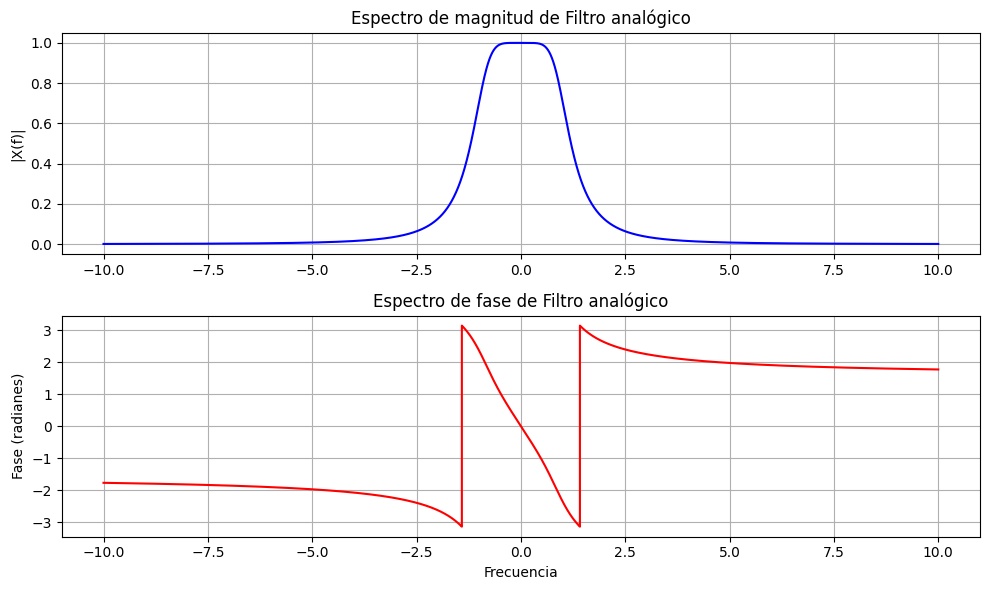

In [81]:
#Pasamos a frecuencia 
omega_im  =1j *  np.linspace(-10, 10 , 1000000) #PARA OBTENER UNA BUENA RESOLUCIÓN
filtro_analogico  = 1/((1+ omega_im)*(omega_im**2 + omega_im + 1))
#Ploteamos espectro de magnitud y fase
plotear_magnitud_fase(filtro_analogico , omega_im/1j , "Filtro analógico") #No está en DB 


Ahora debemos estimar la frecuencia de corte del filtro . Existen muchos métodos para obtener este valor y dependería mucho de acuerdo a la aplicación del filtro pasabajos; pero un buen estimador general sería el criterio de los 3dB para medir que tanto de cae la señal con respecto al pico (3dB en lineal sería lo equivalente a indicar en q frecuencia decayo hasta la mitad de la potencia máxima).

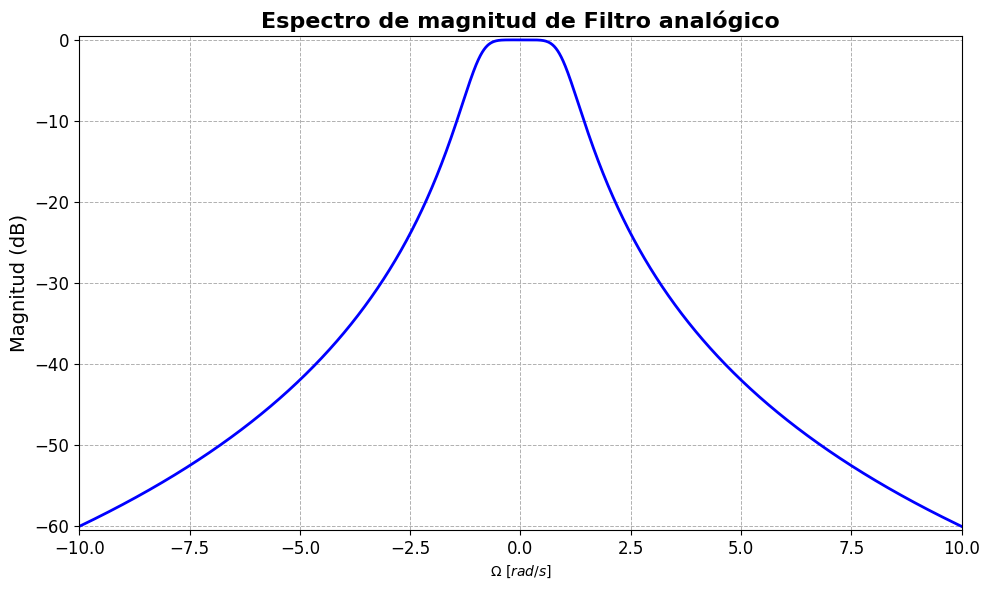

In [82]:
#Hallamos el filtro en dBs 
def plotear_calcular_H_filtro_analogico(espectro,indices,title):
    espectro_db = 20*np.log10(np.abs(espectro))#Como es magnitud entonces 20log10(magnitud)
    plt.figure(figsize=(10, 6))  
    plt.plot(indices, espectro_db, color='b', linewidth=2, label='Señal analógica')
    plt.title('Espectro de magnitud de '+title , fontsize=16, fontweight='bold')
    plt.xlabel('$\Omega$ $[rad/s]$')
    plt.ylabel('Magnitud (dB)', fontsize=14)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    plt.xlim([indices[0], indices[-1]])  
    plt.ylim([min(espectro_db) - 0.5, max(espectro_db) + 0.5]) 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()  
    plt.show()
    return espectro_db
H_abs_db = plotear_calcular_H_filtro_analogico(filtro_analogico , omega_im/1j , "Filtro analógico") #DEVUELVE EN DB

In [83]:
import scipy.signal as sci

# Hallando la frecuencia aproximada:
def calculo_frecuencia_criterio_3db(espectro_db, freq):
    max_value = np.max(espectro_db)
    nivel_3db = max_value-3
    fake_idx = np.argmin(np.abs(np.flip(espectro_db)-nivel_3db)) #Invertimos el arreglo para hallar el indice de la frecuencia de corte de la derecha
    valor_a_3_db = np.flip(espectro_db)[fake_idx]
    indice = np.where(valor_a_3_db == espectro_db )
    return freq[indice][-1]
freq_corte = calculo_frecuencia_criterio_3db(H_abs_db , np.real(omega_im/1j))
print(f"-------------CALCULO DE FRECUENCIA DE CORTE----------------------")
print(f"La frecuencia de corte usando el criterio de los -3db (implementación propia) es: {freq_corte} rad/s")

-------------CALCULO DE FRECUENCIAS DE CORTE----------------------
La frecuencia de corte usando el criterio de los -3db (implementación propia) es: 0.9992109992109999 rad/s


In [85]:
#ESTIMAR VALORES DENTRO DE LA BANDA DE PASO 
#Calculamos un promedio de los valores de magnitud dentro de la banda de paso 
sum = 0 
count = 0
for i in range(len(filtro_analogico)):
    umbral = np.max(H_abs_db)-3
    if(H_abs_db[i]>umbral):
        sum = sum + np.abs(filtro_analogico[i])
        count = count+1
prom = sum /count
print(f"El valor promedio de los valores dentro de la banda de paso en escala lineal es de { prom}")


El valor promedio de los valores dentro de la banda de paso en escala lineal es de 0.9475717772290423


En resumen  , la magnitud en la banda de paso del filtro pasabajo será de aproximadamente 1 , lo cual es coherente con el diseño de un filtro en general ya que en realidad no se busca que estos ofrezcan una ganancia como tal aunque estos de manera teorica sí podrían ofrecer ganancia , entonces la salida del filtro será casi igual al de la entrada para la componentes frecuenciales que se encuentren dentro de la banda de paso. Por otro lado , se calculo una frecuencia de corte igual a 0.9992109992109999 rad/seg . Este valor podría cambiar de acuerdo a la cantidad de puntos que usemos y hasta la podríamos considerar 1 , pero probablemente la mayoría de valores oscilen al rededor de este valor.

b) Aplicando el método de invarianza del impulso, se desea diseñar
un filtro digital en base al filtro analógico H(s). Para ello determine la
frecuencia de muestreo adecuada para que la frecuencia de corte del filtro
digital sea 0,4 * pi . Presente el filtro diseñado H1(z). Además, grafique la
respuesta en frecuencia en magnitud y fase del filtro digital diseñado,
comente sus resultados.

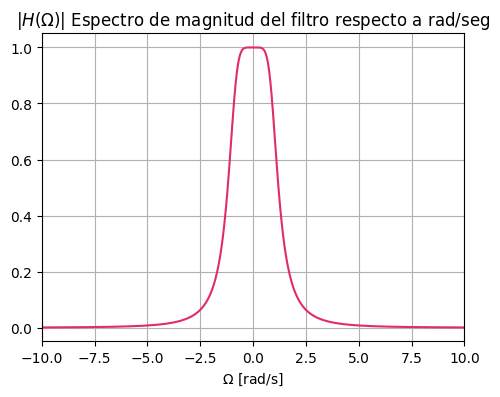

In [99]:
#APLICAMOS METODO DE LA INVARIANZA DEL IMPULSO 
freq_corte #rad/seg
freq_deseada = 0.4 * np.pi  #rad/muestra
T =freq_deseada /freq_corte # (rad/muestra) / (rad/seg) == muestra/seg
fs = 1 / T #DE TAL FORMA TENEMOS LA FRECUENCIA DE MUESTREO QUE REQUERIMOS
omega_im  =1j *  np.linspace(-10, 10 , 1000000) #PARA OBTENER UNA BUENA RESOLUCIÓN
filtro_analogico  = 1/((1+ omega_im)*(omega_im**2 + omega_im + 1))
w = T * np.linspace(-10, 10 , 1000000)
#ESTE ES EL CASO ANTES DE CONVERTIR A RAD Y APLICAR EL METODO DEL PULSO INVARIANTE
fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.title('$|H(\Omega)|$ Espectro de magnitud del filtro respecto a rad/seg')
plt.plot(np.real(omega_im/1j),np.abs(filtro_analogico),color='#E12D61')
plt.xlim([np.min(np.real(omega_im/1j)),np.max(np.real(omega_im/1j))])
plt.xlabel('$\Omega$ [rad/s]')
plt.grid('on')


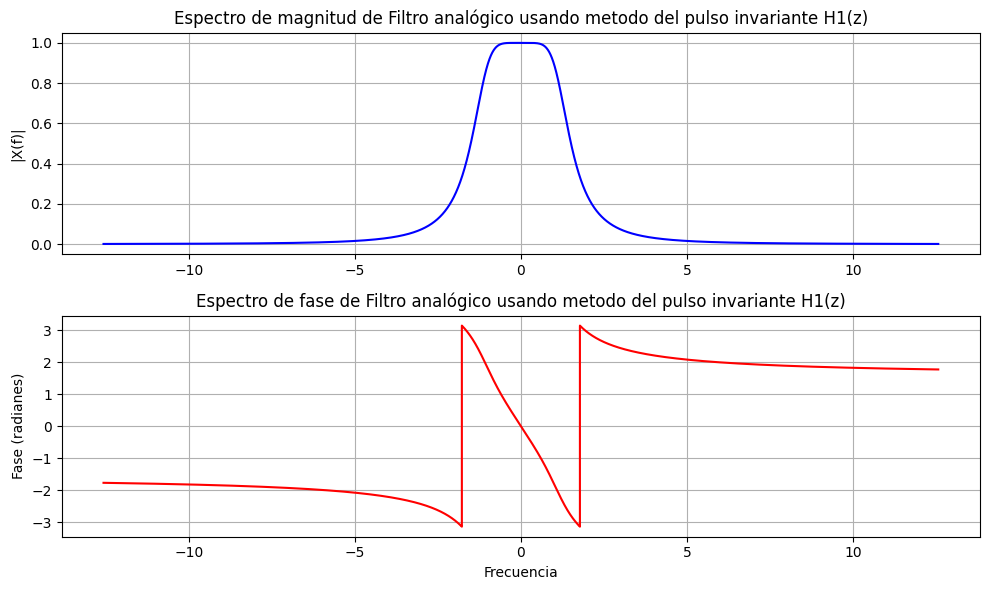

In [101]:
#APLICAMOS EL METODO DEL PULSO INVARIANTE
plotear_magnitud_fase(filtro_analogico,w , "Filtro analógico usando metodo del pulso invariante H1(z)")

In [97]:
freq_corte_pulso_invariante = calculo_frecuencia_criterio_3db(20*np.log10(np.abs(filtro_analogico)) , np.real(omega_im/1j))*(1/fs)
print(f"-------------CALCULO DE FRECUENCIA DE CORTE----------------------")
print(f"La frecuencia de corte usando el criterio de los -3db (implementación propia) es: {freq_corte_pulso_invariante} rad/s")
if(freq_corte_pulso_invariante == np.pi *0.4):
    print(f"La frecuencia de corte es igual a la deseada {np.pi*0.4 } usando una frecuencia de muestreo de {fs} Samples/second o periodo de muestreo de {1/fs} segundos")

-------------CALCULO DE FRECUENCIA DE CORTE----------------------
La frecuencia de corte usando el criterio de los -3db (implementación propia) es: 1.2566370614359172 rad/s
La frecuencia de corte es igual a la deseada 1.2566370614359172 usando una frecuencia de muestreo de 0.7951468485811127 Samples/second o periodo de muestreo de 1.2576293319711123 segundos


El metodo de invarianza de pulso lo que nos indica es que dadas las características del sistema , podemos desplazar la frecuencia de corte de usando una frecuencia de muestreo adecuada en particular para este caso se determino una frecuencia de muestreo dividiendo la deseada y la frecuencia de corte calculada en la anterior sección a) debido a sus unidades resultaba conveniente para determinarla y resulto ser efectiva para realizar el desplazamiento pedido.

In [183]:
#RESPECTO A LA FORMA DE H1(z)
import sympy as sym
s = sym.symbols('s')
z = sym.symbols('z')
k = sym.symbols('k',integer=True)
filtro = 1/((1+s)*(s**2 + s +1 ))
raices= np.roots(np.convolve([1,1] ,[1,1,1]))
#Hay 3 raices
sym.apart(filtro)
coe=np.ones(3, dtype=complex)
#Para los coeficientes se aplican fraccciones parciales pero como no se me ocurre una forma de calcularlas directamente usando python la haré a mano y harcodearé los valores aquí
coe[0] =  1.0 # Para raiz = -1
coe[1] = (1-1j*np.sqrt(3))/(2*np.sqrt(3) *1j)#Para segunda raiz
coe[2] = (-1.0-1j*np.sqrt(3))/(2*np.sqrt(3) *1j)#Para tercera raiz

In [184]:
#FORMA DEL FILTRO H1(z)
H_1_z = coe[0]/(1-((sym.exp(raices[0] * T))*(z**-1))) + coe[1]/(1-((sym.exp(raices[1] * T))*(z**-1))) + coe[2]/(1-((sym.exp(raices[2] * T))*(z**-1)))
H_1_z

(-0.5 - 0.288675134594813*I)/(1 - 0.483300713763039*exp(1.25940224172721*I)/z) + (-0.5 + 0.288675134594813*I)/(1 - 0.483300713763039*exp(-1.25940224172721*I)/z) + 1.0/(1 - 0.233579579923862/z)

Aplicamos la formula de conversión dada del metodo de invarianza del impulso , su forma así como está descrita es coherente ya que dos polos como se pueden ver son el conjugado del otro mientras. 

En conclusión , se pudo alterar la frecuencia de corte del filtro pasabajos de forma sencilla usando una determinada frecuenncia de muestreo de tal forma que la gráfica de contraiga en el dominio de la frecuencia y llegue a la deseada , esto se puede entender tmb como un proceso que tiene un proceso intermedio de C/D para poder determinar la expansión de la señal para alcanzar la frecuencia de corte deseada.Además cabe mencionar que al realizar esta técnica no se intordujo distorsión en la fase (sigue siendo lineal).

c) (1 pto.) Aplicando el método de transformación bilineal, se desea diseñar
un filtro digital en función del filtro analógico H(s). Para ello determine el
valor que debe tomar el parámetro de transformación alpha para que la
frecuencia de corte del filtro digital sea 0,4*pi. Presente el filtro diseñado
H2(z). Además, grafique la respuesta en frecuencia en magnitud y fase
del filtro digital diseñado, comente sus resultados.

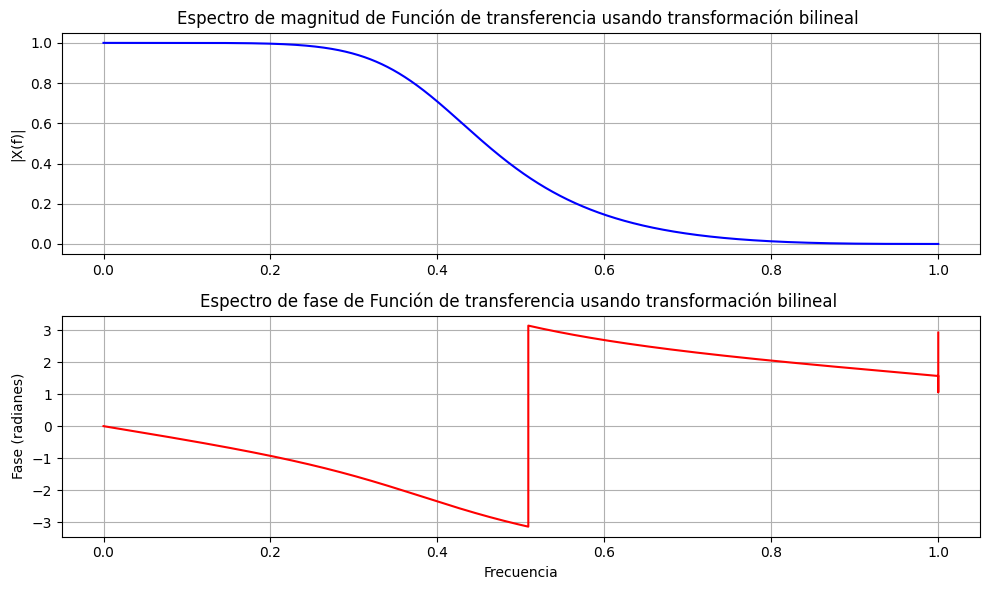

In [149]:
frecuencia_deseada = 0.4 * np.pi #frecuencia de corte deseada
alfa = (freq_corte / (np.tan(frecuencia_deseada/2))) #Calculamos alpha mediante la fórmula
T = 2/alfa #Calculamos el perido de muestreo
fs_bilineal =  1/T #También la frecuencia de muestreo 
coe_numerador = [1] #Como casi no me queda tiempo para acabar esto usaremos funciones predeterminadas de librerías para calcular directamente la transformación bilineal
coe_denominador = np.convolve([1,1] , [1,1,1])
deno_z ,  num_z = sci.bilinear(coe_numerador ,coe_denominador , fs_bilineal)
w, funcion_trans_H_2 = sci.freqz(deno_z, num_z, worN=1000000) #Determinamos la salida en frecuencia basada en la transformada zeta usando 1000000 muestras
plotear_magnitud_fase(funcion_trans_H_2, w/np.pi, "Función de transferencia usando transformación bilineal ") 


In [153]:
# Usamos esto funcion_trans_H_2 para calcular la frecuencia de corte
funcion_trans_H_2_db =  20*np.log10(np.abs(funcion_trans_H_2))
freq_corte_trans_bilineal = calculo_frecuencia_criterio_3db(funcion_trans_H_2_db, w)
print(f"La frecuencia de corte del filtro diseñado usando la tecnica de transformación bilineal es de {freq_corte_trans_bilineal} rad/samples ")
#Igual a 0.4*pi

La frecuencia de corte del filtro diseñado usando la tecnica de transformación bilineal es de 1.2566339198432637 rad/samples 


In [157]:
#Ahora presentaremos la forma de la expresión H2(z)
H_s = 1/((s+1)*(s**2 + s + 1))
H_z =  H_s.subs(s, alfa*((z-1)/(z+1))) 
print("Esta es la forma del filtro H2(z) para la transformación bilineal")
sym.simplify(H_z)

Esta es la forma del filtro H2(z) para la transformación bilineal


(z + 1)**3/((2.37529595404996*z - 0.375295954049957)*(1.89143896122618*(z - 1)**2 + 1.37529595404996*(z - 1)*(z + 1) + (z + 1)**2))

En conclusión , se logró alterar las características del filtro LPF para que la frecuencia de corte sea la deseada , aplicando transformacioones bilineales apartir del factor alpha . En particular , este proceso consiste en substituir las componentes de s por una euivalencia en z y con ellos llegar a lo requerido , esta tecnica podría producir distorsión no lineal en la señal al sistema en el que se aplique. 